In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [14]:
df = pd.read_csv("data\LIACC\mabalone_data.csv", ",")
df.dtypes

sex                 int64
length            float64
d3a1eter          float64
he3ght            float64
whole we3ght      float64
shucked_we3ght    float64
v3scera_we3ght    float64
shell_we3ght      float64
r3ngs               int64
dtype: object

In [2]:
# Split according to distribution

df = pd.read_csv("data\LIACC\mabalone_data.csv", ",")
df= df.fillna(0)

# Calculate Correlation between coloumns 
corr_values = []
highest_corr = 0
highest_col = 0

for col in df:
    corr = df["r3ngs"].corr(df[col])
    corr_values.append(corr)
    if corr >= max(corr_values) and corr < 1.0:
        highest_corr = corr
        highest_col = col
    #print("Correlation between the target and "+ str(col) + " : " + str(corr))
    #print(highest_corr)

# Selecto Corr >= 0,4 and sort data accordingly 
print ("Column: "+str(highest_col)+ " has the highest correlation with the target: " + str(highest_corr))
df = df.sort_values(by=[highest_col], ascending = False)
df = df.reset_index(drop=True)

# Split df in 3 equal parts
split = int(len(df[:1000])/3)
df_1 = df.loc[0:split,:]
df_2 = df.loc[split:split*2,:]
df_3 = df.loc[split*2:split*3,:]
print("Df has been split into 3 equal parts: ",df_1.shape,df_2.shape,df_3.shape)

Column: shell_we3ght has the highest correlation with the target: 0.6275740445103217
Df has been split into 3 equal parts:  (334, 9) (334, 9) (334, 9)


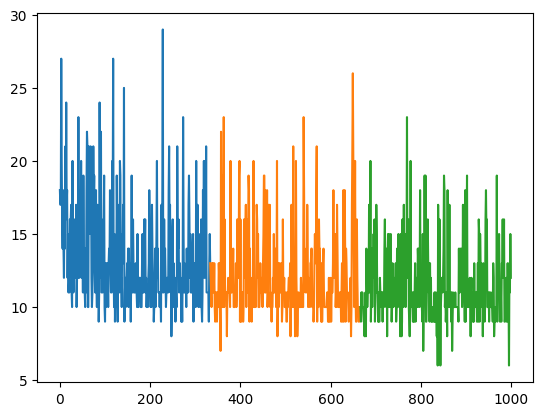

In [16]:
plt.plot(df_1["r3ngs"])
plt.plot(df_2["r3ngs"])
plt.plot(df_3["r3ngs"])
#plt.xlim(0, len(Xt[:25]))
plt.show()

## Prepare Experiment

In [85]:
df_src = df_2 #.append(df_2)
#print(df_src.head(), df_src.shape)

df_tar = df_3
#print(df_tar.head(), df_tar.shape)

In [ ]:
'''df = pd.read_csv("Concrete_Data_2.csv", ";")

df = df.astype('float32')

pd.options.display.float_format = '{:,.2f}'.format
df.apply(lambda x: x.astype(int) if np.allclose(x, x.astype(int)) else x)
df = df.drop(columns="6.00")

df_src = df.loc[0:600,:]
#print(df_src.head(), df_src.shape)

df_tar = df.loc[601:1000,:]
#print(df_tar.head(), df_tar.shape)'''

In [86]:
# source
Xs = df_src.iloc[:,:-1]
Ys = df_src.iloc[:,-1]

# target_train
Xt = df_tar.iloc[:,:-1]
Yt = df_tar.iloc[:,-1]

## Metrics

In [94]:
from get_metrics import get_transferability_metrics

import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]


sub_src_df_1 = ['df_1', 'df_2', 'df_1', 'df_3', 'df_1', 'df_2']
sub_tar_df_2 = ['df_1', 'df_1', 'df_2', 'df_2', 'df_3', 'df_3']

Values = []

for i in range (0,6):

        # get current src and tar

        df_src = getattr(modobj, sub_src_df_1[i])
        df_tar = getattr(modobj, sub_tar_df_2[i])
        
        save_values = get_transferability_metrics(df_src, df_tar)

        Values.append(save_values)

'# MMD\nmmd = []\ninterator = int (len(df_src)/len(df_tar[:25]))\nc=0 \n\nfor i in range (1, interator+1):\n    #print ("I=",i)\n    #print (len(df_src[c:i*25]))\n    mmd.append(mmd_linear(df_src[c:i*25],df_src[c:i*25],Xt[:25],Yt[:25]))\n    c=i*25'

In [95]:
save_values

[0.10833741141923976,
 0.004339575881368291,
 1.0958083832335328,
 0.21017964071856288,
 0.07826616625450204,
 nan]

# Models


## KMM

In [88]:
import sklearn
from TL_Regression_Methods.KMM import KMM
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

results_transfer = []
results_transfer_val = []

model = DecisionTreeRegressor(max_depth=5) #KNeighborsRegressor(n_neighbors=3) #linear_model.Lasso(alpha=15) #DecisionTreeRegressor(max_depth=5)
model.fit(Xs, Ys)
y_pre_kmm = model.predict(Xt[:25])
mse_kmm = mean_squared_error(Yt[:25], y_pre_kmm)

results_transfer.append(mse_kmm)
y_pre_ridge = model.predict(Xt[25:])
mse_kmm_val = sklearn.metrics.mean_squared_error(Yt[25:], y_pre_ridge)
results_transfer_val.append(mse_kmm_val)

'''plt.plot(Yt.reset_index(drop=True))
plt.plot(y_pre_kmm)
plt.xlim(0, len(Xt[:25]))
plt.title('KMM with MSE: '+ str(mse_kmm))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()'''

print("MSE Transfer Testdata: ", np.mean(results_transfer))
print("MSE Transfer Validationdata: ", np.mean(results_transfer_val))

MSE Transfer Testdata:  4.638337777062957
MSE Transfer Validationdata:  10.02509047885607


In [89]:
import sklearn
from TL_Regression_Methods.KMM import KMM
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

results_transfer = []
results_transfer_val = []

model = linear_model.Lasso(alpha=15) #KNeighborsRegressor(n_neighbors=3) #linear_model.Lasso(alpha=15) #DecisionTreeRegressor(max_depth=5)
model.fit(Xs, Ys)
y_pre_kmm = model.predict(Xt[:25])
mse_kmm = mean_squared_error(Yt[:25], y_pre_kmm)

results_transfer.append(mse_kmm)
y_pre_ridge = model.predict(Xt[25:])
mse_kmm_val = sklearn.metrics.mean_squared_error(Yt[25:], y_pre_ridge)
results_transfer_val.append(mse_kmm_val)

'''plt.plot(Yt.reset_index(drop=True))
plt.plot(y_pre_kmm)
plt.xlim(0, len(Xt[:25]))
plt.title('KMM with MSE: '+ str(mse_kmm))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()'''

print("MSE Transfer Testdata: ", np.mean(results_transfer))
print("MSE Transfer Validationdata: ", np.mean(results_transfer_val))

MSE Transfer Testdata:  7.907708415504322
MSE Transfer Validationdata:  7.296171101782252


In [90]:
import sklearn
from TL_Regression_Methods.KMM import KMM
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

results_transfer = []
results_transfer_val = []

model = KNeighborsRegressor(n_neighbors=3) #KNeighborsRegressor(n_neighbors=3) #linear_model.Lasso(alpha=15) #DecisionTreeRegressor(max_depth=5)
model.fit(Xs, Ys)
y_pre_kmm = model.predict(Xt[:25])
mse_kmm = mean_squared_error(Yt[:25], y_pre_kmm)

results_transfer.append(mse_kmm)
y_pre_ridge = model.predict(Xt[25:])
mse_kmm_val = sklearn.metrics.mean_squared_error(Yt[25:], y_pre_ridge)
results_transfer_val.append(mse_kmm_val)

'''plt.plot(Yt.reset_index(drop=True))
plt.plot(y_pre_kmm)
plt.xlim(0, len(Xt[:25]))
plt.title('KMM with MSE: '+ str(mse_kmm))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()'''

print("MSE Transfer Testdata: ", np.mean(results_transfer))
print("MSE Transfer Validationdata: ", np.mean(results_transfer_val))

MSE Transfer Testdata:  9.239999999999998
MSE Transfer Validationdata:  9.462064005753328


## TwoStageTrAdaBoostR2

334 18 7
At step: 5
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 6
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 7
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 8
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 9
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30


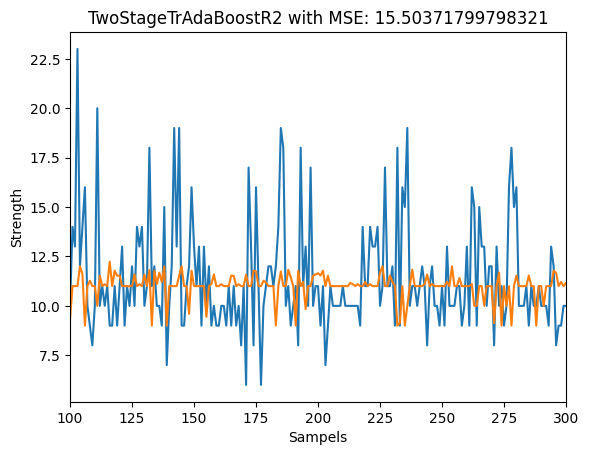

MSE Transfer Testdata:  15.50371799798321
MSE Transfer Validationdata:  7.435685141532272


In [91]:
from TL_Regression_Methods.TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

results_transfer = []
results_transfer_val = []

# Train Test Split
df_train, df_test= train_test_split(df_tar[:25], random_state=0)

# source
n_source1 = len(df_src)
x_source1 = df_src.iloc[:,:-1]
y_source1 = df_src.iloc[:,-1]

# target_train
n_target_train = len(df_train)
x_target_train = df_train.iloc[:,:-1]
y_target_train = df_train.iloc[:,-1]

# target_test
n_target_test = len(df_test)
x_target_test = df_test.iloc[:,:-1]
y_target_test = df_test.iloc[:,-1]

print(len(df_src),len(df_train),len(df_test))

for i in range(1, 2):
    # 4. transfer learning regressiong for the target_train data
    # 4.1 data combination and initial setting specification
    X = np.concatenate((x_source1, x_target_train))
    y = np.concatenate((y_source1, y_target_train))
    sample_size = [n_source1, n_target_train]

    n_estimators = 80
    steps = 10
    fold = 5
    random_state = np.random.RandomState(1)

    regr_1 = TwoStageTrAdaBoostR2( DecisionTreeRegressor(max_depth=5), #linear_model.Lasso(alpha=15), #KNeighborsRegressor(n_neighbors=3),
                        n_estimators = n_estimators, sample_size = sample_size, 
                        steps = steps, fold = fold, 
                        random_state = random_state)
    regr_1.fit(X, y)
    y_pre_twostageboost = regr_1.predict(x_target_test)
    mse_twostageboost = mean_squared_error(y_target_test, y_pre_twostageboost) 

    results_transfer.append(mse_twostageboost)

    y_pre_twostageboost = regr_1.predict(Xt[25:])
    mse_ridge_val = sklearn.metrics.mean_squared_error(Yt[25:], y_pre_twostageboost)
    results_transfer_val.append(mse_ridge_val)

plt.plot(df_tar.iloc[:,-1].reset_index(drop=True))
plt.plot(y_pre_twostageboost)
plt.xlim(100, 300)
plt.title('TwoStageTrAdaBoostR2 with MSE: '+ str(mse_twostageboost))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

print("MSE Transfer Testdata: ", np.mean(results_transfer))
print("MSE Transfer Validationdata: ", np.mean(results_transfer_val))

334 18 7


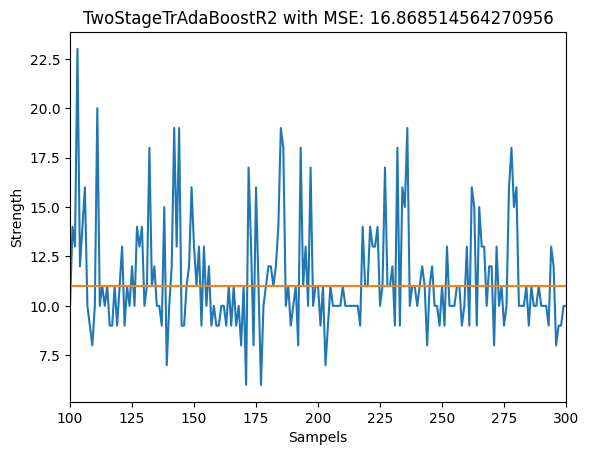

MSE Transfer Testdata:  16.868514564270956
MSE Transfer Validationdata:  7.19052366358588


In [92]:
from TL_Regression_Methods.TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

results_transfer = []
results_transfer_val = []

# Train Test Split
df_train, df_test= train_test_split(df_tar[:25], random_state=0)

# source
n_source1 = len(df_src)
x_source1 = df_src.iloc[:,:-1]
y_source1 = df_src.iloc[:,-1]

# target_train
n_target_train = len(df_train)
x_target_train = df_train.iloc[:,:-1]
y_target_train = df_train.iloc[:,-1]

# target_test
n_target_test = len(df_test)
x_target_test = df_test.iloc[:,:-1]
y_target_test = df_test.iloc[:,-1]

print(len(df_src),len(df_train),len(df_test))

for i in range(1, 2):
    # 4. transfer learning regressiong for the target_train data
    # 4.1 data combination and initial setting specification
    X = np.concatenate((x_source1, x_target_train))
    y = np.concatenate((y_source1, y_target_train))
    sample_size = [n_source1, n_target_train]

    n_estimators = 80
    steps = 10
    fold = 5
    random_state = np.random.RandomState(1)

    regr_1 = TwoStageTrAdaBoostR2( linear_model.Lasso(alpha=15), #linear_model.Lasso(alpha=15), #KNeighborsRegressor(n_neighbors=3),
                        n_estimators = n_estimators, sample_size = sample_size, 
                        steps = steps, fold = fold, 
                        random_state = random_state)
    regr_1.fit(X, y)
    y_pre_twostageboost = regr_1.predict(x_target_test)
    mse_twostageboost = mean_squared_error(y_target_test, y_pre_twostageboost) 

    results_transfer.append(mse_twostageboost)

    y_pre_twostageboost = regr_1.predict(Xt[25:])
    mse_ridge_val = sklearn.metrics.mean_squared_error(Yt[25:], y_pre_twostageboost)
    results_transfer_val.append(mse_ridge_val)

plt.plot(df_tar.iloc[:,-1].reset_index(drop=True))
plt.plot(y_pre_twostageboost)
plt.xlim(100, 300)
plt.title('TwoStageTrAdaBoostR2 with MSE: '+ str(mse_twostageboost))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

print("MSE Transfer Testdata: ", np.mean(results_transfer))
print("MSE Transfer Validationdata: ", np.mean(results_transfer_val))

334 18 7
At step: 3
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 4
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 5
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 6
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 7
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 8
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Current stp interval: 1e-30
At step: 9
Binary search's goal not meeted! Value is set to be the available best!
Try reducing the search interval. Curr

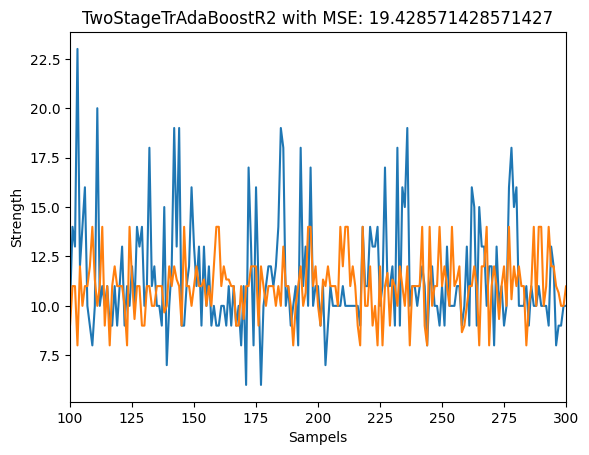

MSE Transfer Testdata:  19.428571428571427
MSE Transfer Validationdata:  8.13160733549083


In [93]:
from TL_Regression_Methods.TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

results_transfer = []
results_transfer_val = []

# Train Test Split
df_train, df_test= train_test_split(df_tar[:25], random_state=0)

# source
n_source1 = len(df_src)
x_source1 = df_src.iloc[:,:-1]
y_source1 = df_src.iloc[:,-1]

# target_train
n_target_train = len(df_train)
x_target_train = df_train.iloc[:,:-1]
y_target_train = df_train.iloc[:,-1]

# target_test
n_target_test = len(df_test)
x_target_test = df_test.iloc[:,:-1]
y_target_test = df_test.iloc[:,-1]

print(len(df_src),len(df_train),len(df_test))

for i in range(1, 2):
    # 4. transfer learning regressiong for the target_train data
    # 4.1 data combination and initial setting specification
    X = np.concatenate((x_source1, x_target_train))
    y = np.concatenate((y_source1, y_target_train))
    sample_size = [n_source1, n_target_train]

    n_estimators = 80
    steps = 10
    fold = 5
    random_state = np.random.RandomState(1)

    regr_1 = TwoStageTrAdaBoostR2( KNeighborsRegressor(n_neighbors=3), #linear_model.Lasso(alpha=15), #KNeighborsRegressor(n_neighbors=3),
                        n_estimators = n_estimators, sample_size = sample_size, 
                        steps = steps, fold = fold, 
                        random_state = random_state)
    regr_1.fit(X, y)
    y_pre_twostageboost = regr_1.predict(x_target_test)
    mse_twostageboost = mean_squared_error(y_target_test, y_pre_twostageboost) 

    results_transfer.append(mse_twostageboost)

    y_pre_twostageboost = regr_1.predict(Xt[25:])
    mse_ridge_val = sklearn.metrics.mean_squared_error(Yt[25:], y_pre_twostageboost)
    results_transfer_val.append(mse_ridge_val)

plt.plot(df_tar.iloc[:,-1].reset_index(drop=True))
plt.plot(y_pre_twostageboost)
plt.xlim(100, 300)
plt.title('TwoStageTrAdaBoostR2 with MSE: '+ str(mse_twostageboost))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

print("MSE Transfer Testdata: ", np.mean(results_transfer))
print("MSE Transfer Validationdata: ", np.mean(results_transfer_val))

# Baselines

## Baseline DecisionTreeRegressor

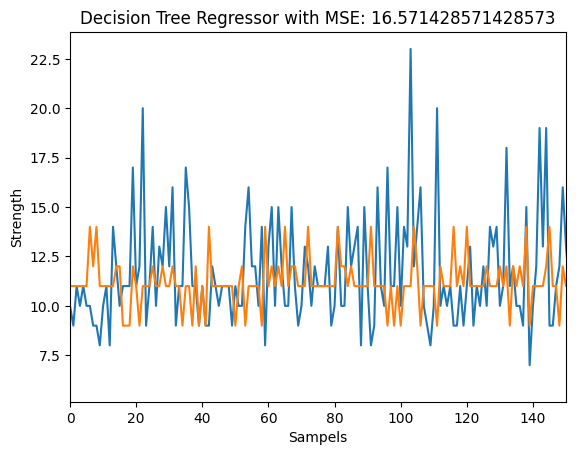

MSE Baseline Testdata:  16.66834170854272
MSE Baseline Validationdata:  7.655315412011514


In [79]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

results_transfer = []
results_transfer_val = []

# Train Test Split
X_train, X_test, y_train, y_test= train_test_split(Xt[:25], Yt[:25], random_state=0)

for i in range(1, 200):
    clf = DecisionTreeRegressor(max_depth=5)
    clf.fit(X_train, y_train)
    y_pre_ridge = clf.predict(X_test)
    mse_ridge = sklearn.metrics.mean_squared_error(y_test, y_pre_ridge)
    results_transfer.append(mse_ridge)

    y_pre_ridge = clf.predict(Xt[25:])
    mse_ridge_val = sklearn.metrics.mean_squared_error(Yt[25:], y_pre_ridge)
    results_transfer_val.append(mse_ridge_val)

plt.plot(df_tar.iloc[:,-1].reset_index(drop=True))
plt.plot(y_pre_ridge)
plt.xlim(0, 150)
plt.title('Decision Tree Regressor with MSE: '+ str(mse_ridge))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

print("MSE Baseline Testdata: ", np.mean(results_transfer))
print("MSE Baseline Validationdata: ", np.mean(results_transfer_val))

## Baseline KNeighborsRegressor 

In [80]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

results_transfer = []
results_transfer_val = []

# Train Test Split
X_train, X_test, y_train, y_test= train_test_split(Xt[:25], Yt[:25], random_state=0)

for i in range(1, 200):
    clf = KNeighborsRegressor(n_neighbors=3)
    clf.fit(X_train, y_train)
    y_pre_ridge = clf.predict(X_test)
    mse_knr = sklearn.metrics.mean_squared_error(y_test, y_pre_ridge)

    results_transfer.append(mse_knr)

    y_pre_ridge = clf.predict(Xt[25:])
    mse_ridge_val = sklearn.metrics.mean_squared_error(Yt[25:], y_pre_ridge)
    results_transfer_val.append(mse_ridge_val)

'''plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pre_ridge)
plt.xlim(0, len(y_test))
plt.title('KNeighborsRegressor: '+ str(mse_knr))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)'''

print("MSE Baseline Testdata: ", np.mean(results_transfer))
print("MSE Baseline Validationdata: ", np.mean(results_transfer_val))

MSE Baseline Testdata:  21.0
MSE Baseline Validationdata:  9.189500179791441


## Baseline Lasso

In [81]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

results_transfer = []
results_transfer_val = []

# Train Test Split
X_train, X_test, y_train, y_test= train_test_split(Xt[:25], Yt[:25], random_state=0)

for i in range(1, 200):
    clf = linear_model.Lasso(alpha=15)
    clf.fit(X_train, y_train)
    y_pre_ridge = clf.predict(X_test)
    mse_ridge = sklearn.metrics.mean_squared_error(y_test, y_pre_ridge)
    results_transfer.append(mse_ridge)

    y_pre_ridge = clf.predict(Xt[25:])
    mse_ridge_val = sklearn.metrics.mean_squared_error(Yt[25:], y_pre_ridge)
    results_transfer_val.append(mse_ridge_val)

'''plt.plot(y_test.reset_index(drop=True))
plt.plot(y_pre_ridge)
plt.xlim(0, len(y_target_test))
plt.title('Decision Tree Regressor with MSE: '+ str(mse_ridge))
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()'''

print("MSE Baseline Testdata: ", np.mean(results_transfer))
print("MSE Baseline Validationdata: ", np.mean(results_transfer_val))

MSE Baseline Testdata:  20.573192239858912
MSE Baseline Validationdata:  8.562867074193933


# Visulization

In [ ]:
#from TL_Regression_Methods.KMM import KMM
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

#BDA
bda = BDA(kernel_type='primal', dim=30, lamb=1, mu=0.5, mode='BDA', gamma=1, estimate_mu=False)
mse_bda, y_pre_bda, list_acc = bda.fit_predict(Xs, Ys, Xt, Yt)

#JDA
jda = JDA(kernel_type='primal', dim=30, lamb=1, gamma=1)
mse_jda, y_pre_jda, list_acc = jda.fit_predict(Xs, Ys, Xt, Yt)

#Coral
coral = CORAL()
k = 1
mse_coral, y_pre_coral = coral.fit_predict(Xs, Ys, Xt, Yt, k)

#KMM
model = KNeighborsRegressor(n_neighbors=7)
model.fit(Xs, Ys)
y_pre_kmm = model.predict(Xt)
mse_kmm = sklearn.metrics.mean_squared_error(Yt, ypre_kmm)

## Comparative Vis

In [132]:
import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]

metrics= ['bda', 'jda', 'coral', 'kmm','twostageboost','lwe']
colours= ['#1f77b4', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#1f77b4']
hor= [0,1,2,0,1,2]
ver= [0,1,0,1,0,1]

fig, axs = plt.subplots(2, 3)

c = 0
for i in metrics:
    axs[ver[c], hor[c]].plot(Yt.reset_index(drop=True), c='#1f77b4', label=i, linewidth=1)
    axs[ver[c], hor[c]].plot(getattr(modobj, "y_pre_"+ str(i)), c='#d62728', label=i, linewidth=1)
    axs[ver[c], hor[c]].set_title(i)
    axs[ver[c], hor[c]].set_xlim([0, 50])
    axs[ver[c], hor[c]].text(hor[c]*1.2+12, ver[c]*-1.2+2.15, 'MSE: '+ str(round(getattr(modobj, "mse_"+ str(i)),3)) )
    c+=1

fig.supxlabel('Sample')
fig.supylabel('Vorhersage')
fig.set_figwidth(10) 

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

AttributeError: module '__main__' has no attribute 'y_pre_bda'

In [251]:
df = pd.read_csv("Difference_Metrics.csv", ";",decimal=',')


#df = df.drop(df.index[6:6+12]).drop(df.index[24:24+12]).drop(df.index[42:42+12]).drop(df.index[60:60+12])
df = df.drop(df.index[0:0+12]).drop(df.index[18:18+12]).drop(df.index[36:36+12]).drop(df.index[54:54+12])
print(df.shape)

(24, 9)


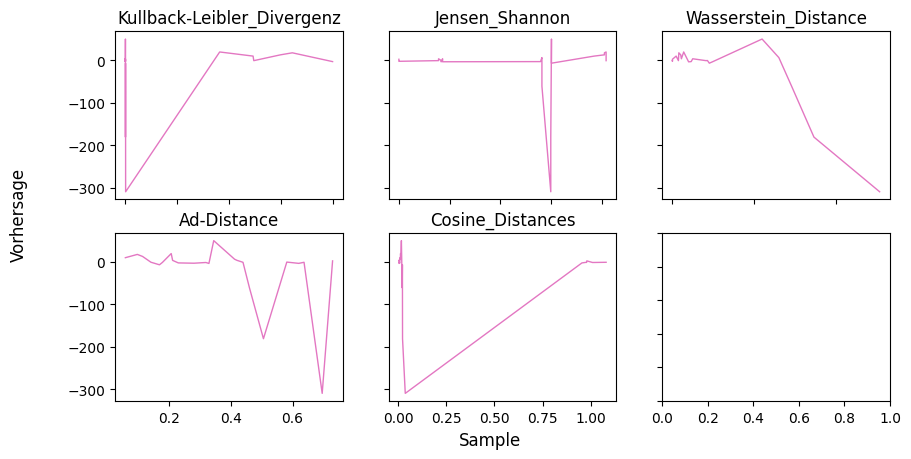

In [252]:
import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]

#df = pd.read_csv("Difference_Metrics.csv", ";",decimal=',')[0:18]#[18:36]#[36:54]#[54:72]
metrics= ["Kullback-Leibler_Divergenz", "Cosine_Distances",	"Wasserstein_Distance",	"Ad-Distance","Jensen_Shannon"]
colours= ['#1f77b4', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#1f77b4']
hor= [0,1,2,0,1,2]
ver= [0,1,0,1,0,1]

fig, axs = plt.subplots(2, 3)

c = 0
for i in metrics:
    df = df.sort_values(by=i).reset_index(drop= True)
    df = df.set_index(i)
    axs[ver[c], hor[c]].plot( (df["K_T"] + df["K_V"] + df["A_T"] + df["A_V"]) /4, c='#e377c2', label=i, linewidth=1)
    #axs[ver[c], hor[c]].plot(df["K_V"], c='#2ca02c', label=i, linewidth=1)
    #axs[ver[c], hor[c]].plot(df["A_T"], c='#9467bd', label=i, linewidth=1)
    #axs[ver[c], hor[c]].plot(df["A_V"], c='#8c564b', label=i, linewidth=1)
    axs[ver[c], hor[c]].set_title(i)
    '''axs[ver[c], hor[c]].plot(getattr(modobj, "y_pre_"+ str(i)), c='#d62728', label=i, linewidth=1)
    axs[ver[c], hor[c]].set_title(i)
    axs[ver[c], hor[c]].set_xlim([0, 50])
    axs[ver[c], hor[c]].text(hor[c]*1.2+12, ver[c]*-1.2+2.15, 'MSE: '+ str(round(getattr(modobj, "mse_"+ str(i)),3)) )'''
    c+=1

fig.supxlabel('Sample')
fig.supylabel('Vorhersage')
fig.set_figwidth(10) 

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

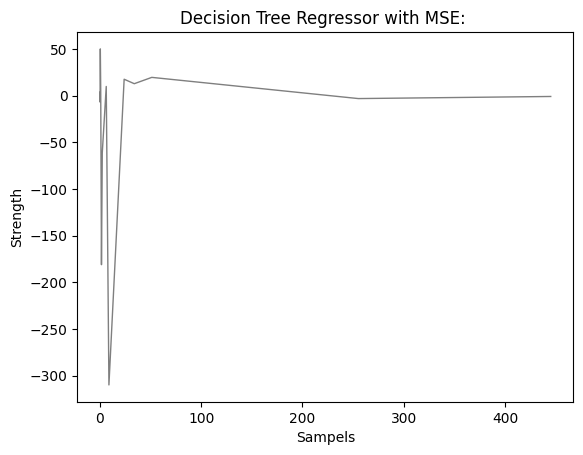

In [281]:
df = pd.read_csv("Difference_Metrics.csv", ";",decimal=',')#[0:18]#[18:36]#[36:54]#[54:72]
df = df.drop(df.index[0:0+12]).drop(df.index[18:18+12]).drop(df.index[36:36+12]).drop(df.index[54:54+12])
df["kombi"] = df["Wasserstein_Distance"] * df["Ad-Distance"] * 0.01*df["Kullback-Leibler_Divergenz"]
df = df.sort_values(by="kombi").reset_index(drop= True)
df = df.set_index("kombi")

plt.plot( (df["K_T"] + df["K_V"] + df["A_T"] + df["A_V"]) /4, c='#7f7f7f', label=i, linewidth=1)
plt.title('Decision Tree Regressor with MSE: ')
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

In [279]:
pd.read_csv("Difference_Metrics.csv", ";",decimal=',')#[0:18]#[18:36]#[36:54]#[54:72]
df = df.drop(df.index[0:0+12]).drop(df.index[18:18+12]).drop(df.index[36:36+12]).drop(df.index[54:54+12])
df["kombi"] = df["Wasserstein_Distance"] * df["Ad-Distance"]
df["kombi"].corr(df["K_T"])

nan

In [282]:
pd.read_csv("Difference_Metrics.csv", ";",decimal=',')#[0:18]#[18:36]#[36:54]#[54:72]
df = df.drop(df.index[0:0+12]).drop(df.index[18:18+12]).drop(df.index[36:36+12]).drop(df.index[54:54+12])
df["kombi"] = df["Wasserstein_Distance"] * df["Ad-Distance"]
df["kombi"].corr(df["K_T"])

-0.7729492296368912

In [ ]:
import sys
modname = globals()['__name__']
modobj  = sys.modules[modname]

df = pd.read_csv("Difference_Metrics.csv", ";",decimal=',')#[0:18]#[18:36]#[36:54]#[54:72]
df = df.drop(df.index[0:0+12]).drop(df.index[18:18+12]).drop(df.index[36:36+12]).drop(df.index[54:54+12])
metrics= ["Kullback-Leibler_Divergenz", "Cosine_Distances",	"Wasserstein_Distance",	"Ad-Distance","Jensen_Shannon"]
colours= ['#1f77b4', '#2ca02c', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf','#1f77b4']
hor= [0,1,2,0,1,2]
ver= [0,1,0,1,0,1]

fig, axs = plt.subplots(2, 3)

c = 0
for i in metrics:
    df = df.sort_values(by=i).reset_index(drop= True)
    df = df.set_index(i)
    axs[ver[c], hor[c]].plot( (df["K_T"] + df["K_V"] + df["A_T"] + df["A_V"]) /4, c='#7f7f7f', label=i, linewidth=1)
    axs[ver[c], hor[c]].plot(df["K_V"], c='#2ca02c', label=i, linewidth=1)
    axs[ver[c], hor[c]].plot(df["A_T"], c='#9467bd', label=i, linewidth=1)
    axs[ver[c], hor[c]].plot(df["A_V"], c='#8c564b', label=i, linewidth=1)
    axs[ver[c], hor[c]].set_title(i)
    '''axs[ver[c], hor[c]].plot(getattr(modobj, "y_pre_"+ str(i)), c='#d62728', label=i, linewidth=1)
    axs[ver[c], hor[c]].set_title(i)
    axs[ver[c], hor[c]].set_xlim([0, 50])
    axs[ver[c], hor[c]].text(hor[c]*1.2+12, ver[c]*-1.2+2.15, 'MSE: '+ str(round(getattr(modobj, "mse_"+ str(i)),3)) )'''
    c+=1

fig.supxlabel('Sample')
fig.supylabel('Vorhersage')
fig.set_figwidth(10) 

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [172]:
df.shape

(18, 4)

In [133]:
df = pd.read_csv("Difference_Metrics.csv", ";",decimal=',')
df.dtypes
df = df.sort_values(by=["Kullback-Leibler_Divergenz"]).reset_index(drop= True)
df = df.set_index("Kullback-Leibler_Divergenz")
df

,K_T,K_V,A_T,A_V,Cosine_Distances,Wasserstein_Distance,Ad-Distance,Jensen_Shannon
Kullback-Leibler_Divergenz,,,,,,,,
0.001579,0.91,-0.74,1.00,0.30,1.080050,0.000215,0.637485,0.00000
0.001579,-1.40,-0.78,1.43,0.51,1.080050,0.000215,0.637485,0.00000
0.001579,-1.11,-0.96,-1.51,-0.24,1.080050,0.000215,0.637485,0.00000
0.001997,-1.05,-1.77,-0.06,-0.04,1.009872,0.000120,0.318204,0.00000
0.001997,-0.61,-1.96,-1.21,-2.04,1.009872,0.000120,0.318204,0.00000
...,...,...,...,...,...,...,...,...
32108.650000,10.56,805.81,8.67,800.90,0.013320,0.783230,0.095440,0.40561
32108.650000,41.30,-7.16,42.16,-5.86,0.013320,0.783230,0.095440,0.40561
39849.040000,-22.52,-1.85,13.27,2.86,0.008600,2.290100,0.279600,0.27960


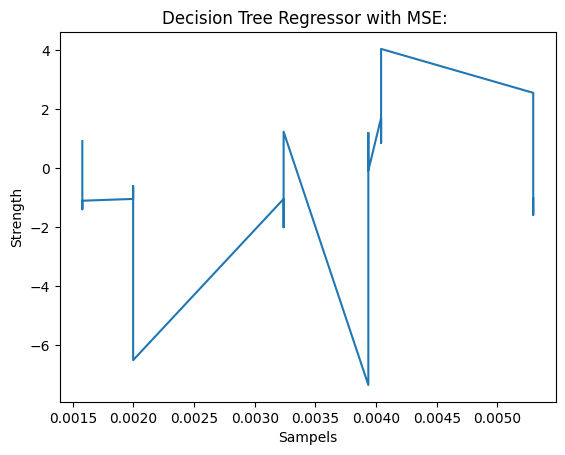

In [131]:
df = pd.read_csv("Difference_Metrics.csv", ";",decimal=',')
df.dtypes
df = df.sort_values(by=["Kullback-Leibler_Divergenz"]).reset_index(drop= True)
df = df.set_index("Kullback-Leibler_Divergenz")
plt.plot(df["K_T"].iloc[:18])
#plt.plot(df["K_V"].iloc[:18])
#plt.plot(df["A_T"].iloc[:18])
#plt.plot(df["K_V"].iloc[:18])
plt.title('Decision Tree Regressor with MSE: ')
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()

In [ ]:
df = pd.read_csv("Difference_Metrics.csv", ";",decimal=',')
df.dtypes
df = df.sort_values(by=["Kullback-Leibler_Divergenz"]).reset_index(drop= True)
df = df.set_index("Kullback-Leibler_Divergenz")
plt.plot(df["K_T"].iloc[:18])
#plt.plot(df["K_V"].iloc[:18])
#plt.plot(df["A_T"].iloc[:18])
#plt.plot(df["K_V"].iloc[:18])
plt.title('Decision Tree Regressor with MSE: ')
plt.xlabel('Sampels')
plt.ylabel('Strength')
plt.show()